In [ ]:
import pandas as pd
import os

In [42]:
dataset_path="C:/Users/avina/MyProjects/Brain_tumour_detection/Dataset"
for dirname, _, filenames in os.walk(dataset_path):
    for filename in filenames:
        print(os.path.join(dirname, filename))

C:/Users/avina/MyProjects/Brain_tumour_detection/Dataset\Testing\glioma_tumor\image(1).jpg
C:/Users/avina/MyProjects/Brain_tumour_detection/Dataset\Testing\glioma_tumor\image(10).jpg
C:/Users/avina/MyProjects/Brain_tumour_detection/Dataset\Testing\glioma_tumor\image(100).jpg
C:/Users/avina/MyProjects/Brain_tumour_detection/Dataset\Testing\glioma_tumor\image(11).jpg
C:/Users/avina/MyProjects/Brain_tumour_detection/Dataset\Testing\glioma_tumor\image(12).jpg
C:/Users/avina/MyProjects/Brain_tumour_detection/Dataset\Testing\glioma_tumor\image(13).jpg
C:/Users/avina/MyProjects/Brain_tumour_detection/Dataset\Testing\glioma_tumor\image(14).jpg
C:/Users/avina/MyProjects/Brain_tumour_detection/Dataset\Testing\glioma_tumor\image(15).jpg
C:/Users/avina/MyProjects/Brain_tumour_detection/Dataset\Testing\glioma_tumor\image(16).jpg
C:/Users/avina/MyProjects/Brain_tumour_detection/Dataset\Testing\glioma_tumor\image(17).jpg
C:/Users/avina/MyProjects/Brain_tumour_detection/Dataset\Testing\glioma_tumor\im

In [43]:
base_path = os.path.join(dataset_path, 'Training')
categories = ["glioma_tumour", "meningioma_tumour", "no_tumor", "pituitary_tumour"]

In [44]:
categories = os.listdir(base_path)

image_paths = []
labels = []

for category in categories:
    category_path = os.path.join(base_path, category)
    
    if not os.path.isdir(category_path):
        continue  # Skip if it's not a folder

    for image_name in os.listdir(category_path):
        if image_name.lower().endswith(('.jpg', '.jpeg', '.png')):
            image_path = os.path.join(category_path, image_name)
            image_paths.append(image_path)
            labels.append(category)

df = pd.DataFrame({
    "image_path": image_paths,
    "label": labels
})

print(df.tail())


                                              image_path            label
31425  C:/Users/avina/MyProjects/Brain_tumour_detecti...  pituitary_tumor
31426  C:/Users/avina/MyProjects/Brain_tumour_detecti...  pituitary_tumor
31427  C:/Users/avina/MyProjects/Brain_tumour_detecti...  pituitary_tumor
31428  C:/Users/avina/MyProjects/Brain_tumour_detecti...  pituitary_tumor
31429  C:/Users/avina/MyProjects/Brain_tumour_detecti...  pituitary_tumor


In [45]:
print(df.shape,df.columns)
print(df['label'].value_counts())



(31430, 2) Index(['image_path', 'label'], dtype='object')
label
no_tumor            8370
pituitary_tumor     8112
meningioma_tumor    7517
glioma_tumor        7431
Name: count, dtype: int64


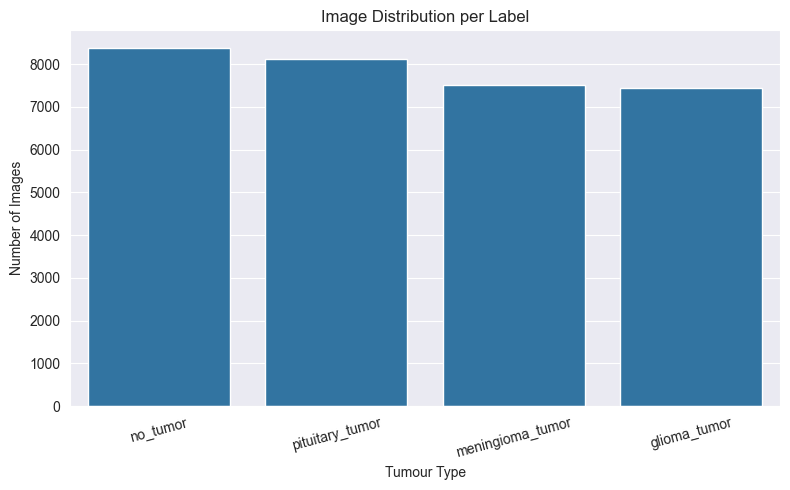

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.countplot(data=df, x='label', order=df['label'].value_counts().index)
plt.title('Image Distribution per Label')
plt.xlabel('Tumour Type')
plt.ylabel('Number of Images')
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()


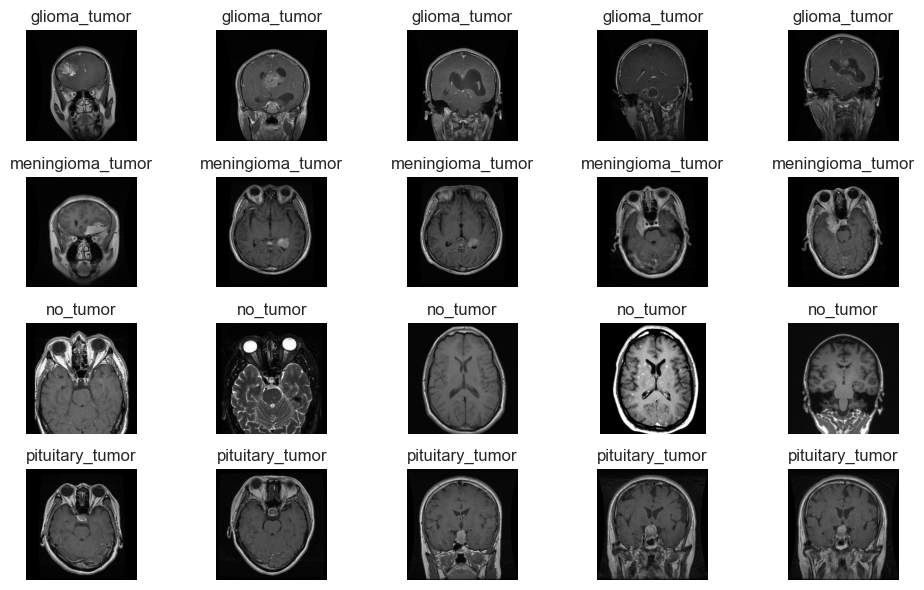

In [47]:
import cv2

num_images = 5

plt.figure(figsize = (10,6))

for i,category in enumerate(categories):
    category_images = df[df['label'] == category]['image_path'].iloc[:num_images]
    for j , image_path in enumerate(category_images):
        img = cv2.imread(image_path)
        img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
        plt.subplot(len(categories),num_images,i*num_images + j + 1)
        plt.imshow(img)
        plt.axis('off')
        plt.title(category)

plt.tight_layout()
plt.show()

In [48]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['category'] = le.fit_transform(df['label'])

In [49]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=42)
X_resampled,y_resampled = ros.fit_resample(df[['image_path']],df['category'])
df_resampled = pd.DataFrame(X_resampled,columns = ['image_path'])
df_resampled['category'] = y_resampled
print(df_resampled['category'].value_counts())
df_resampled

category
0    8370
1    8370
2    8370
3    8370
Name: count, dtype: int64


,image_path,category
0,C:/Users/avina/MyProjects/Brain_tumour_detecti...,0
1,C:/Users/avina/MyProjects/Brain_tumour_detecti...,0
2,C:/Users/avina/MyProjects/Brain_tumour_detecti...,0
3,C:/Users/avina/MyProjects/Brain_tumour_detecti...,0
4,C:/Users/avina/MyProjects/Brain_tumour_detecti...,0
...,...,...
33475,C:/Users/avina/MyProjects/Brain_tumour_detecti...,3
33476,C:/Users/avina/MyProjects/Brain_tumour_detecti...,3
33477,C:/Users/avina/MyProjects/Brain_tumour_detecti...,3
33478,C:/Users/avina/MyProjects/Brain_tumour_detecti...,3


In [50]:
from imblearn.over_sampling import RandomOverSampler
print("Imbalanced-learn and sklearn imported successfully!")



Imbalanced-learn and sklearn imported successfully!


In [51]:
import time
import shutil
import pathlib
import itertools
from PIL import Image

import cv2
import seaborn as sns
sns.set_style('darkgrid')
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.optimizers import Adam, Adamax
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout, BatchNormalization
from keras import regularizers

import warnings
warnings.filterwarnings("ignore")

print ('check')


check


In [52]:
df_resampled['category'] = df_resampled['category'].astype(str)

In [53]:
train_df_new, temp_df_new = train_test_split(
    df_resampled,
    train_size=0.8,
    shuffle=True,
    random_state=42,
    stratify=df_resampled['category']
)

valid_df_new, test_df_new = train_test_split(
    temp_df_new,
    test_size=0.5,
    shuffle=True,
    random_state=42,
    stratify=temp_df_new['category']
)

In [54]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

batch_size = 16
img_size = (224, 224)
channels = 3
img_shape = (img_size[0], img_size[1], channels)

tr_gen = ImageDataGenerator(rescale=1./255)
ts_gen = ImageDataGenerator(rescale=1./255)

train_gen_new = tr_gen.flow_from_dataframe(
    train_df_new,
    x_col='image_path',
    y_col='category',
    target_size=img_size,
    class_mode='sparse',
    color_mode='rgb',
    shuffle=True,
    batch_size=batch_size
)

valid_gen_new = ts_gen.flow_from_dataframe(
    valid_df_new,
    x_col='image_path',
    y_col='category',
    target_size=img_size,
    class_mode='sparse',
    color_mode='rgb',
    shuffle=True,
    batch_size=batch_size
)

test_gen_new = ts_gen.flow_from_dataframe(
    test_df_new,
    x_col='image_path',
    y_col='category',
    target_size=img_size,
    class_mode='sparse',
    color_mode='rgb',
    shuffle=False,
    batch_size=batch_size
)

Found 26784 validated image filenames belonging to 4 classes.
Found 3348 validated image filenames belonging to 4 classes.
Found 3348 validated image filenames belonging to 4 classes.


In [55]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [56]:
physical_devices = tf.config.list_physical_devices('GPU')
if physical_devices:
    print("Using GPU")
else:
    print("Using CPU")

Using GPU


In [57]:
import tensorflow as tf
print(tf.__version__)
print(tf.config.list_physical_devices('GPU'))


2.10.0
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [58]:
# Import necessary modules from TensorFlow and Keras
from tensorflow.keras.applications import DenseNet121  # Pretrained DenseNet model
from tensorflow.keras.models import Model
from tensorflow.keras.layers import (
    GlobalAveragePooling2D, Dense, Dropout, BatchNormalization,
    GaussianNoise, Input, MultiHeadAttention, Reshape
)
from tensorflow.keras.optimizers import Adam
import tensorflow as tf

# Function to create a DenseNet-based CNN model with attention
def create_DenseNet_model(input_shape):
    # Define the input layer
    inputs = Input(shape=input_shape)

    # Load DenseNet121 without top classification layers
    base_model = DenseNet121(weights='imagenet', input_tensor=inputs, include_top=False)

    # Freeze base model layers
    for layer in base_model.layers:
        layer.trainable = False

    # Get base model output (typically 7x7x1024 for DenseNet121)
    x = base_model.output
    height, width, channels = 7, 7, 1024

    # Reshape to (batch_size, 49, 1024) for attention
    x = Reshape((height * width, channels))(x)

    # Apply Multi-Head Attention
    x = MultiHeadAttention(num_heads=8, key_dim=channels)(x, x)

    # Reshape back to CNN-compatible format
    x = Reshape((height, width, channels))(x)

    # Add Gaussian noise
    x = GaussianNoise(0.25)(x)

    # Global average pooling
    x = GlobalAveragePooling2D()(x)

    # Fully connected layers
    x = Dense(512, activation='relu')(x)
    x = BatchNormalization()(x)
    x = GaussianNoise(0.25)(x)
    x = Dropout(0.25)(x)

    # Final classification layer
    outputs = Dense(4, activation='softmax')(x)

    # Create the final model
    model = Model(inputs=inputs, outputs=outputs)
    return model

# Set the input shape
input_shape = (224, 224, 3)

# Create and compile the model
cnn_model = create_DenseNet_model(input_shape)

cnn_model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


In [67]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

# Callback to save the best model based on validation accuracy
checkpoint_callback = ModelCheckpoint(
    filepath='best_model.h5',      # File to save the best model
    monitor='val_accuracy',        # Metric to monitor
    save_best_only=True,           # Only save model if it's the best so far
    mode='max',                    # Maximize the monitored metric
    verbose=1                      # Print message when model is saved
)

# Callback to stop training early if validation loss doesn't improve
early_stopping = EarlyStopping(
    monitor='val_loss',            # Metric to monitor
    patience=5,                    # Stop after 5 epochs without improvement
    restore_best_weights=True,     # Load best weights after stopping
    verbose=1
)

# Use both callbacks during training
history = cnn_model.fit(
    train_gen_new,                 # Your training data generator
    validation_data=valid_gen_new, # Your validation data
    epochs=20,                     # Number of epochs
    callbacks=[checkpoint_callback, early_stopping],
    verbose=1
)
cnn_model.save('DenseNet2.h5')  # Saves in HDF5 format


Epoch 1/20
1674/1674 [==============================] - ETA: 0s - loss: 0.1267 - accuracy: 0.9567
Epoch 1: val_accuracy improved from -inf to 0.92682, saving model to best_model.h5
1674/1674 [==============================] - 186s 111ms/step - loss: 0.1267 - accuracy: 0.9567 - val_loss: 0.2134 - val_accuracy: 0.9268
Epoch 2/20
1674/1674 [==============================] - ETA: 0s - loss: 0.1060 - accuracy: 0.9629
Epoch 2: val_accuracy improved from 0.92682 to 0.92712, saving model to best_model.h5
1674/1674 [==============================] - 186s 111ms/step - loss: 0.1060 - accuracy: 0.9629 - val_loss: 0.2107 - val_accuracy: 0.9271
Epoch 3/20
1674/1674 [==============================] - ETA: 0s - loss: 0.0802 - accuracy: 0.9708
Epoch 3: val_accuracy improved from 0.92712 to 0.94892, saving model to best_model.h5
1674/1674 [==============================] - 187s 112ms/step - loss: 0.0802 - accuracy: 0.9708 - val_loss: 0.1453 - val_accuracy: 0.9489
Epoch 4/20
1674/1674 [==================

In [ ]:
import numpy as np
test_labels = test_gen_new.classes
predictions = cnn_model.predict(test_gen_new)
predicted_classes = np.argmax(predictions, axis=1)

210/210 [==============================] - 20s 88ms/step


In [ ]:
import numpy as np
from sklearn.metrics import classification_report
from tensorflow.keras.models import load_model # type: ignore
from tensorflow.keras.preprocessing.image import ImageDataGenerator # type: ignore

# 1. Load the trained model
model = load_model('C:/Users/avina/MyProjects/Brain_tumour_using_GPU/Saved models/DenseNet.h5')

# 2. Prepare test data (rescale and no augmentation)
test_datagen = ImageDataGenerator(rescale=1./255)

# 3. Split the full df into train and test (you may already have this)
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42, stratify=df['label'])

# 4. Load test generator from dataframe
test_gen = test_datagen.flow_from_dataframe(
    dataframe=test_df,
    x_col='image_path',
    y_col='label',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

# 5. Predict
pred_probs = model.predict(test_gen, verbose=1)
predicted_classes = np.argmax(pred_probs, axis=1)
true_classes = test_gen.classes
class_labels = list(test_gen.class_indices.keys())

# 6. Classification report
report = classification_report(true_classes, predicted_classes, target_names=class_labels)
print(report)


Found 6286 validated image filenames belonging to 4 classes.
197/197 [==============================] - 32s 155ms/step
                  precision    recall  f1-score   support

    glioma_tumor       0.99      0.99      0.99      1486
meningioma_tumor       0.99      0.98      0.99      1504
        no_tumor       1.00      1.00      1.00      1674
 pituitary_tumor       1.00      1.00      1.00      1622

        accuracy                           0.99      6286
       macro avg       0.99      0.99      0.99      6286
    weighted avg       0.99      0.99      0.99      6286



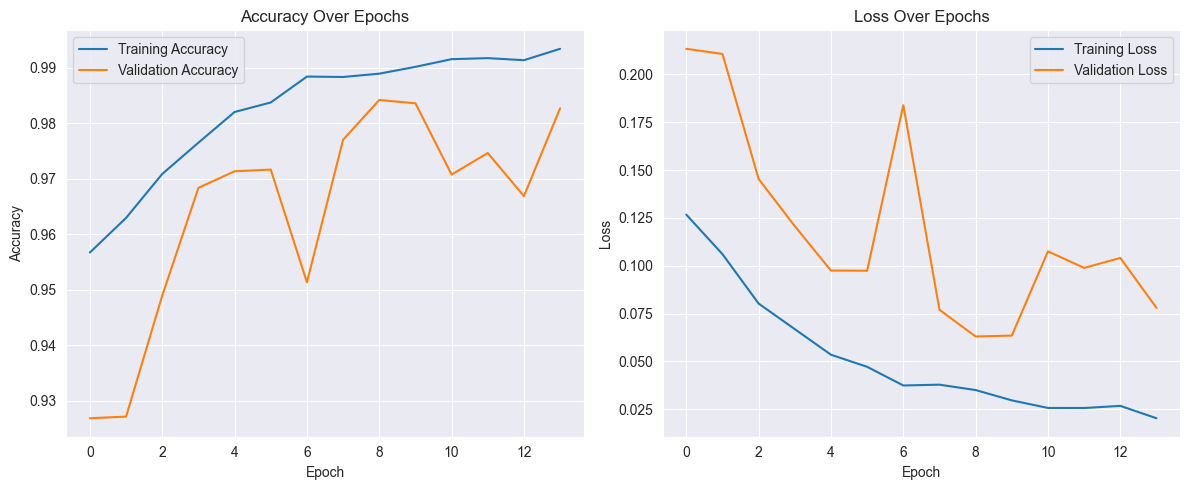

In [68]:
import matplotlib.pyplot as plt

# Plot accuracy
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


210/210 [==============================] - 32s 149ms/step
True: 3348, Predicted: 3348
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       837
           1       0.98      0.97      0.97       837
           2       1.00      0.99      0.99       837
           3       0.98      1.00      0.99       837

    accuracy                           0.99      3348
   macro avg       0.99      0.99      0.99      3348
weighted avg       0.99      0.99      0.99      3348



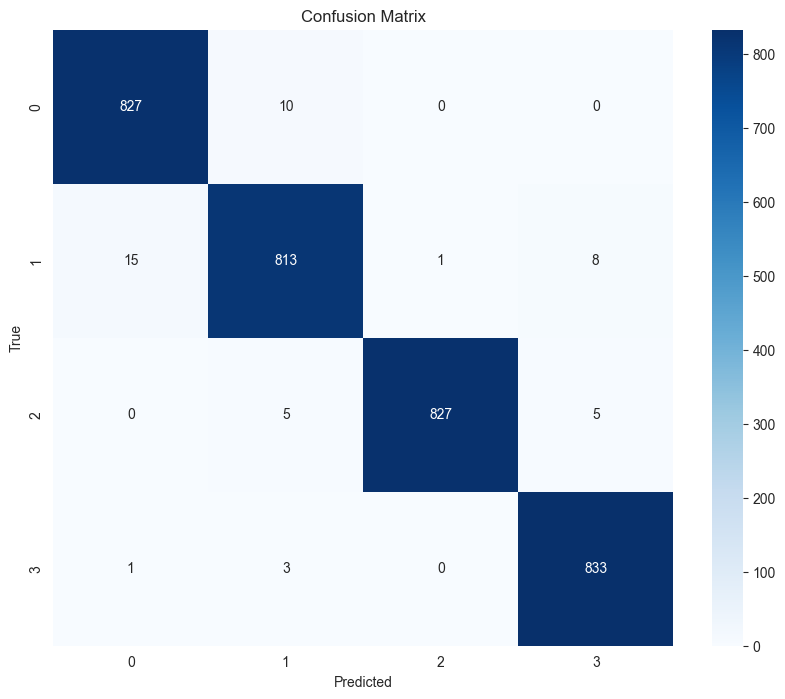

In [71]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Load the model
from tensorflow.keras.models import load_model
model = load_model("best_model.h5")

# Predict on test data
test_gen_new.reset()
predictions = model.predict(test_gen_new, verbose=1)

# Get predicted classes
predicted_classes = np.argmax(predictions, axis=1)

# Get true labels (FULL — no slicing needed if shuffle=False is set)
true_classes = test_gen_new.classes

# Check if lengths match — IMPORTANT
print(f"True: {len(true_classes)}, Predicted: {len(predicted_classes)}")

# Compute classification report
class_labels = list(test_gen_new.class_indices.keys())

report = classification_report(true_classes, predicted_classes, target_names=class_labels)
print(report)

# Optional: Confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(true_classes, predicted_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [75]:
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model

# Path to the best saved model
model_path = 'C:/Users/avina/MyProjects/Brain_tumour_using_GPU/Saved models/DenseNet.h5'

# Load the saved model
model = load_model(model_path)

# Function to load and preprocess an image, and make a prediction
def predict_tumor(image_path):
    # Load image and resize to match the model input shape
    img = image.load_img(image_path, target_size=(224, 224))
    
    # Convert image to array and expand dimensions (add batch axis)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)

    # Optionally normalize pixel values (if your training data was normalized)
    img_array = img_array / 255.0

    # Make prediction
    predictions = model.predict(img_array)
    predicted_class = np.argmax(predictions)

    # Define your class labels (adjust according to your dataset)
    class_labels = ['Glioma', 'Meningioma', 'no_tumour', 'Pituitary']

    # Output the result
    print(f"Predicted class: {class_labels[predicted_class]} (Confidence: {np.max(predictions)*100:.2f}%)")

# Example usage
predict_tumor('Dataset/Testing/pituitary_tumor/image(7).jpg')  # Replace with your image file path


1/1 [==============================] - 1s 1s/step
Predicted class: Pituitary (Confidence: 99.28%)


In [ ]:
print(test_gen_new.class_indices)


{'0': 0, '1': 1, '2': 2, '3': 3}
